## Notebook for creating plots from MLIS1 Outputs

Owner: George Hine

email: ppygh3@nottingham.ac.uk

In [1]:
import sys
sys.path.append('..')


In [2]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.getcwd()

'/home/borge/spiral_arms/George'

In [3]:
from gax import sersic
from gax.sersic import sersic_2d_linear_pix
from matplotlib import pyplot as plt
import jax
import jax.numpy as jnp
import astropy
import numpy as np
from astropy.table import Table, vstack
import gax_fits as gfits
from astropy.io import fits
from scipy.interpolate import RegularGridInterpolator

bands = np.array(['u','g','r','i','z'])
wavs = np.array([354.3e-9, 477.0e-9, 623.1e-9, 762.5e-9, 913.4e-9], dtype=float)



In [4]:
comp_1138, tab_1138 = gfits.Composite_from_directory_raid('587726031719301138','/home/borge/Data/MLIS1_Output/Output_28_03_23/')
comp_5037, tab_5037 = gfits.Composite_from_directory_raid('587731892188545037','/home/borge/Data/MLIS1_Output/Output_28_03_23/')
comp_4619, tab_4619 = gfits.Composite_from_directory_raid('587736584426094619','/home/borge/Data/MLIS1_Output/Output_28_03_23/')

# This is stupid and cannot be done this way when the data gets large

In [5]:
# Instead will use candidate names
candidates = np.array(['587726031719301138','587731892188545037','587736584426094619','587741603105210388','588017702930022421','588017724937142430','588848900983357543']).astype(str)

# create array of identifiers:
identifiers = np.asarray([s[-4:] for s in candidates])
identifiers.astype(str)

array(['1138', '5037', '4619', '0388', '2421', '2430', '7543'],
      dtype='<U4')

In [6]:
# Define the stationary components

parent_dir = '/home/borge/Data/MLIS1_Output/Output_28_03_23/'
comp_ = 'comp_'
tab_ = 'tab_'


In [7]:
# Assign all the candidates information from the directory raid to variables

for i in range(0,len(identifiers)):
    exec('{}{}, {}{} = gfits.Composite_from_directory_raid("{}","{}")'.format(tab_,identifiers[i],comp_,identifiers[i],candidates[i],parent_dir))

In [8]:
# Create a list of variable names created
comps = np.empty_like(candidates)

for i in range(0,len(identifiers)):
    comps[i] = '{}{}'.format(comp_,identifiers[i])
    
comps.shape

(7,)

In [9]:
# Make this into a function

def original_dir_raid(candidates,parent_dir):
    
    # Create array of identifiers:
    identifiers = np.asarray([s[-4:] for s in candidates])
    identifiers.astype(str)
    
    # Read in all non processed data
    org_comp_ = 'org_comp_'
    
    for i in range(0,len(identifiers)):
        exec('{}{} = gfits.Read_M_band("{}","{}")'.format(org_comp_,identifiers[i],candidates[i],parent_dir),globals())
    
    # Create a list of variable names created
    comps_array = np.empty_like(candidates)
    

    for i in range(0,len(candidates)):
        comps_array[i] = '{}{}'.format(org_comp_,identifiers[i])
        
        
    return comps_array
    

In [10]:
# So will now make this into a function which returns the list of the variables created

def var_from_dir_raid(candidates,parent_dir):
    
    # Create array of identifiers:
    identifiers = np.asarray([s[-4:] for s in candidates])
    identifiers = identifiers.astype(str)
    
    comp_ = 'comp_'
    tab_ = 'tab_'
    
    # Assign all the candidates information from the directory raid to variables
    for i in range(0,len(identifiers)):
        exec('{}{}, {}{} = gfits.Composite_from_directory_raid("{}","{}")'
             .format(tab_,identifiers[i],comp_,identifiers[i],candidates[i],parent_dir),globals())
        
    # Create a list of variable names created
    comps_array = np.empty_like(candidates)
    tabs_array = np.empty_like(candidates)

    for i in range(0,len(candidates)):
        comps_array[i] = '{}{}'.format(comp_,identifiers[i])
        tabs_array[i] = '{}{}'.format(tab_,identifiers[i])
        
    return comps_array, tabs_array, identifiers
        
    
def get_variable_from_name(name):
    # Create a list of all the defined variables
    var_dict = globals() 
    
    # Get the variables from the list
    var_value = var_dict.get(name)
    
    return var_value        
    
    

(396, 296, 5)

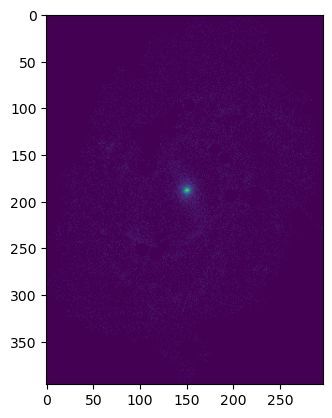

In [11]:
# Read in all non processed data
org_comp_ = 'org_comp_'
loc = '/home/borge/Data_4_transfer/good_spirals/'

for i in range(0,len(identifiers)):
    exec('{}{} = gfits.Read_M_band("{}","{}")'.format(org_comp_,identifiers[i],candidates[i],loc))
    
    
# Try using the function:
list_of_original_comps = original_dir_raid(candidates,loc)
a = get_variable_from_name(list_of_original_comps[0])
plt.imshow(a[:,:,0],vmin=1000,vmax=1200)
a.shape
# Therefore this method works and the function is not the issue

((396, 296, 5),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3828.0,
 984.0,
 0.0,
 2608.3237029394595,
 3828.0,
 0.5513199946109231)

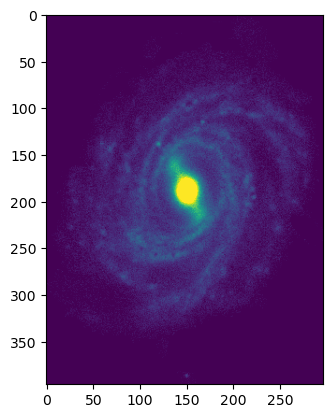

In [44]:
plt.imshow(org_comp_1138[:,:,1],vmin=1000,vmax=1200) # why is this highlighted when it works?


im = org_comp_1138[:,:,1]
exc_im = comp_1138[:,:,1]
background = 1000

arm_frcaer = np.sum(exc_im)/np.sum(im-background)
arm_frcaer # so this works but not in the function??????
comp_1138.shape, exc_im, np.max(im),np.min(im), np.min(exc_im),np.max(exc_im),np.max(im), np.sum(exc_im)/np.sum(im-1000)


In [45]:
arms = gfits.flux_frac(org_comp_1138,comp_1138) 
arms.dtype

[51692001.  49058002.  48783002.5 49258005.  48219010. ]
[0.00124378 0.01235102 0.01626939 0.01447673 0.00311993]


dtype('float64')

In [46]:
# Create a list of variable names created
org_comps = np.empty_like(candidates)

for i in range(0,len(identifiers)):
    org_comps[i] = '{}{}'.format(org_comp_,identifiers[i])
    
org_comps.shape

IndexError: index 80 is out of bounds for axis 0 with size 80

In [ ]:
# Perform flux fraction calculations for candidates

for i in range(0,len(identifiers)):
    exec('flux_frac_{} = gfits.flux_frac({},{})'.format(identifiers[i],org_comps[i],comps[i]))

[1.03384001e+08 9.81160020e+07 9.75660025e+07 9.85160050e+07
 9.64380100e+07]
[0.00585921 0.04167632 0.05221975 0.04864402 0.01016892]
[1.56118001e+08 1.39144002e+08 1.35301002e+08 1.42433005e+08
 1.32341010e+08]
[-0.00153826 -0.02621453 -0.0342005  -0.02443425 -0.00412476]
[2.32061001e+08 2.14154002e+08 2.09635002e+08 2.16331005e+08
 2.24517010e+08]
[-0.00262581 -0.01624159 -0.0259912  -0.0237812  -0.00601186]
[2.95301001e+08 2.71257002e+08 2.66320002e+08 2.72842005e+08
 2.83460010e+08]
[-0.00018738 -0.00450752 -0.00556035 -0.0050853  -0.001683  ]
[3.46921001e+08 3.23199002e+08 3.18696002e+08 3.23558005e+08
 3.48944010e+08]
[-0.00044559 -0.00433931 -0.00580929 -0.00525582 -0.00192024]
[3.83344001e+08 3.62042002e+08 3.56935002e+08 3.60632005e+08
 3.83087010e+08]
[-6.72827962e-05 -1.45191327e-03 -1.68132681e-03 -1.32784656e-03
 -1.81954261e-04]
[4.22630001e+08 3.94787002e+08 3.88966002e+08 3.92939005e+08
 4.16916010e+08]
[-0.00048974 -0.0011096  -0.00123904 -0.00103044 -0.00034978]


In [ ]:
# Create a list of variable names created
flux_frac_ = 'flux_frac_'
flux_fracs = np.empty_like(candidates)

for i in range(0,len(identifiers)):
    flux_fracs[i] = '{}{}'.format(flux_frac_,identifiers[i])
    
flux_fracs

array(['flux_frac_1138', 'flux_frac_5037', 'flux_frac_4619',
       'flux_frac_0388', 'flux_frac_2421', 'flux_frac_2430',
       'flux_frac_7543'], dtype='<U18')

In [ ]:
flux_frac_1138

array([0.00585921, 0.04167632, 0.05221975, 0.04864402, 0.01016892])

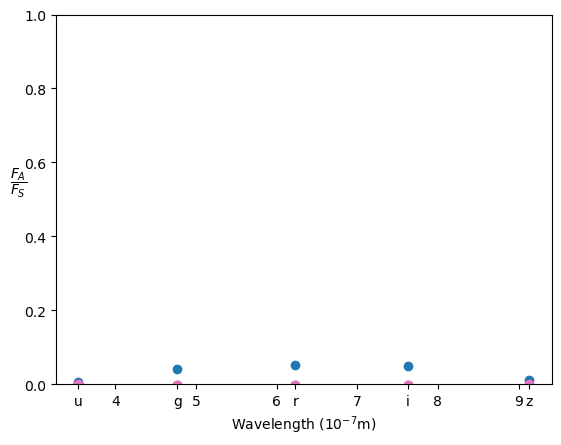

In [ ]:
wavs = np.array([3543.0, 4770.0, 6231.0, 7625.0, 9134.0], dtype=float) * 1e-10


plt.figure()
plt.ylim(0,1)
plt.xlabel('Wavelength ($10^{-7}$m)')
plt.xticks([wavs[0],4*1e-7,wavs[1],5*1e-7,6*1e-7,wavs[2],7*1e-7,wavs[3],8*1e-7,9*1e-7,wavs[4]],['u','4','g','5','6','r','7','i','8','9','z'])
plt.ylabel(r'$\dfrac{F_A}{F_S}$',rotation=0)
for i in range(0,len(candidates)):
    exec('plt.scatter(wavs,{})'.format(flux_fracs[i]))

In [ ]:
# This is good but now want to colourmap by quantities and plot against thinga other than wavelength

# open master fits and filter by face on spirals:
# Define location
path = '/home/borge/Data/gz2and1master.fits.gz'
# Access file
hdul = fits.open(path)

# Access Data
data = hdul[1].data

# create masks for extraction 
mask_gz1 = data['gz1_arms_clean'] == True
mask_gz2 = data['gz2_arms_clean'] == True
# combine masks
mask = mask_gz1 + mask_gz2
# apply mask to data
face_on_master_fits = data[mask]


In [ ]:
# Need to see the OBJID_STR 

len(data['OBJID_STR'][0])

18

In [ ]:
# Mask good spirals:
good_spiral_filename_list = np.loadtxt('/home/borge/ficl/good_spirals/selected_good_spirals.txt',dtype=str)
good_spiral_filename_list

# Remove file information
good_spiral_list = np.empty_like(good_spiral_filename_list,dtype=int)
for i in range(0, len(good_spiral_filename_list)):
    good_spiral_list[i] = good_spiral_filename_list[i].removesuffix('ra.fits.gz')
    
good_spiral_list

array([587726031719301138, 587731892188545037, 587732050555961424,
       587736584426094619, 587741603105210388, 588017702930022421,
       588017724937142430, 588848900983357543])

In [ ]:
# Filter data by good_spiral_list
good_spiral_data = data[np.in1d(data['OBJID'], good_spiral_list)]

In [ ]:

# locate in catalogue
mask = good_spiral_data['OBJID_STR'] == '587726031719301138'
row = Table(good_spiral_data[mask])
print(row)

      OBJID             OBJID_STR       ... arms_clean_union
------------------ -------------------- ... ----------------
587726031719301138 587726031719301138   ...             True


In [ ]:
# cool so make this into a function
def cat_search(catalogue,OBJID):
    mask = catalogue['OBJID_STR'] == OBJID
    row = Table(catalogue[mask])
    return row

tab = cat_search(good_spiral_data,'587726031719301138')
# Nice

In [ ]:
# Get information about OBJID 
cols = tab[0]
cols

OBJID,OBJID_STR,RUN,RERUN,CAMCOL,FIELD,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,PETROMAGERR_U,PETROMAGERR_G,PETROMAGERR_R,PETROMAGERR_I,PETROMAGERR_Z,PSFMAG_R,FIBERMAG_R,DEVMAG_R,DEVMAGERR_R,EXPMAG_R,EXPMAGERR_R,FRACDEV_R,MU50_R,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,ROWC_U,COLC_U,ROWC_G,COLC_G,ROWC_R,COLC_R,ROWC_I,COLC_I,ROWC_Z,COLC_Z,CMODELMAG_R,CMODELMAGERR_R,REDSHIFT,REDSHIFTERR,PETROMAG_MU,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,REGION,PETROR50_R_KPC_SIMPLE_BIN,PETROMAG_MR_SIMPLE_BIN,REDSHIFT_SIMPLE_BIN,WVT_BIN,sample,asset_id,total_count,total_weight,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_weight,t03_bar_a06_bar_weight,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_weight,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_weight,t06_odd_a14_yes_weight,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_weight,t06_odd_a15_no_weighted_fraction,t06_odd_total_weight,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_weight,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_weight,t08_odd_feature_a24_merger_weighted_fraction,t08_odd_feature_a38_dust_lane_weight,t08_odd_feature_a38_dust_lane_weighted_fraction,t08_odd_feature_total_weight,t09_bulge_shape_a25_rounded_weight,t09_bulge_shape_a25_rounded_weighted_fraction,t09_bulge_shape_a26_boxy_weight,t09_bulge_shape_a26_boxy_weighted_fraction,t09_bulge_shape_a27_no_bulge_weight,t09_bulge_shape_a27_no_bulge_weighted_fraction,t09_bulge_shape_total_weight,t10_arms_winding_a28_tight_weight,t10_arms_winding_a28_tight_weighted_fraction,t10_arms_winding_a29_medium_weight,t10_arms_winding_a29_medium_weighted_fraction,t10_arms_winding_a30_loose_weight,t10_arms_winding_a30_loose_weighted_fraction,t10_arms_winding_total_weight,t11_arms_number_a31_1_weight,t11_arms_number_a31_1_weighted_fraction,t11_arms_number_a32_2_weight,t11_arms_number_a32_2_weighted_fraction,t11_arms_number_a33_3_weight,t11_arms_number_a33_3_weighted_fraction,t11_arms_number_a34_4_weight,t11_arms_number_a34_4_weighted_fraction,t11_arms_number_a36_more_than_4_weight,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_total_weight,U,G,R

In [ ]:

U_mag = float(tab['U'])
R_mag = float(tab['R'])

U_mag_err = float(tab['UERR'])
R_mag_err = float(tab['UERR'])

dist = float(tab['COMOVING_DISTANCE'])
z = float(tab['REDSHIFT'])
zerr = float(tab['REDSHIFTERR'])

colour = float(U_mag - R_mag)
colour_err = float(np.sqrt(U_mag_err**2 + R_mag_err**2))
print(colour,colour_err) # in delta magnitudes

# Now want to make this into a function to create

3.336249351501465 0.09935669618835415


In [ ]:
def collect_candidate_info(candidate_list,catalogue):
    
    
    U_mags = np.empty_like(candidate_list,dtype=float)
    R_mags = np.empty_like(candidate_list,dtype=float)

    U_mag_errs = np.empty_like(candidate_list,dtype=float)
    R_mag_errs = np.empty_like(candidate_list,dtype=float)

    dists = np.empty_like(candidate_list,dtype=float)
    zs = np.empty_like(candidate_list,dtype=float)
    zerrs = np.empty_like(candidate_list,dtype=float)

    colours = np.empty_like(candidate_list,dtype=float)
    colour_errs = np.empty_like(candidate_list,dtype=float)
    
    for i in range(0,len(candidate_list)):
        
        tab = cat_search(catalogue,candidate_list[i])
        
        U_mags[i] = float(tab['U'])
        R_mags[i] = float(tab['R'])

        U_mag_errs[i] = float(tab['UERR'])
        R_mag_errs[i] = float(tab['UERR'])

        dists[i] = float(tab['COMOVING_DISTANCE'])
        zs[i] = float(tab['REDSHIFT'])
        zerrs[i] = float(tab['REDSHIFTERR'])

        colours[i] = float(U_mag - R_mag)
        colour_errs[i] = float(np.sqrt(U_mag_err**2 + R_mag_err**2))
        
    return U_mags, R_mags, U_mag_errs, R_mag_errs, dists, zs, zerrs, colours, colour_errs

In [ ]:
list = np.array(['587726031719301138','587731892188545037','587736584426094619','587741603105210388','588017702930022421','588017724937142430','588848900983357543'])
U_mag, R_mag, U_mag_err, R_mag_err, dit, z, zerr, colour, colour_err = collect_candidate_info(list,good_spiral_data)



In [ ]:

# need to get the varaibles from the varible lists some how

def get_variable_from_name(name):
    var_dict = globals() 
    
    var_value = var_dict.get(name)
    
    return var_value
    
#print(flux_fracs[0])

obj587726031719301138_flux_fracs = get_variable_from_name(flux_fracs[0])

print(obj587726031719301138_flux_fracs[0])

# Nice!

0.005859210266464492


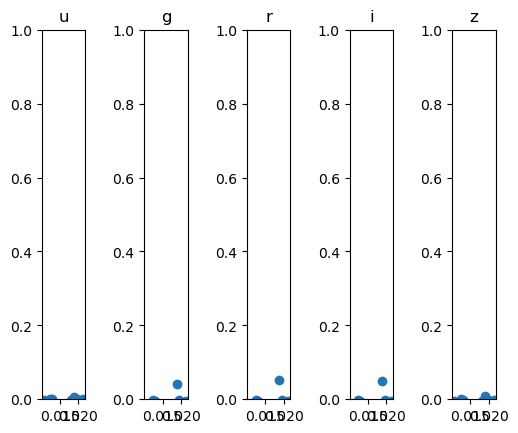

In [ ]:

flux_frac_arr = np.empty((len(candidates),len(bands)))

for i in range(0,len(candidates)):
    flux_frac_arr[i,:] = get_variable_from_name(flux_fracs[i])
    
 
fig, ax = plt.subplots(1,len(bands))

for i in range(0,len(bands)):
    ax[i].scatter(z,flux_frac_arr[:,i])
    ax[i].set_aspect(0.1)
    ax[i].set_ylim(0,1)
    ax[i].set_title('{}'.format(bands[i]))
    
#fig.subplots_adjust(wspace=0.5, hspace=2.5)


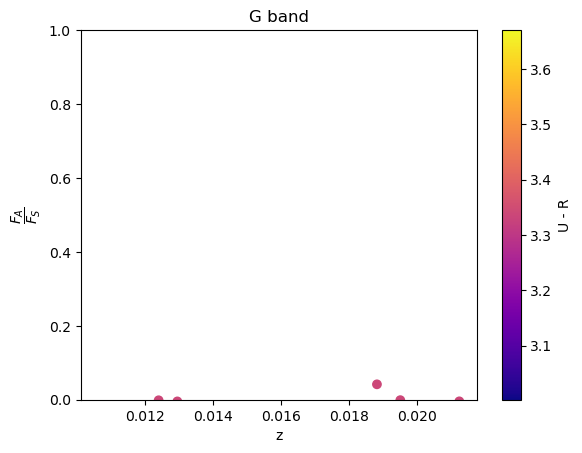

In [ ]:
plt.figure()

plt.title('G band')
plt.xlabel('z')
plt.ylabel(r'$\dfrac{F_A}{F_S}$')
plt.ylim(0,1)
plt.scatter(z,flux_frac_arr[:,1],c=colour,cmap='plasma')
plt.clim(np.min(colour) - np.std(colour),np.max(colour) + np.std(colour))
plt.colorbar(label='U - R')

['org_comp_1138' 'org_comp_5037' 'org_comp_4619' 'org_comp_0388'
 'org_comp_2421' 'org_comp_2430' 'org_comp_7543']
[51692000. 49058000. 48783000. 49258000. 48219000.]
[0.00124378 0.01235102 0.01626939 0.01447673 0.00311993]
[1.04426e+08 9.00860e+07 8.65180e+07 9.31750e+07 8.41220e+07]
[0.00647049 0.02376361 0.02152968 0.0272286  0.00236925]
[75942999.99846174 75009999.97378546 74333999.96579951 73897999.97556576
 92175999.99587524]
[0.00285605 0.01304377 0.01874566 0.01901263 0.00747753]
[63239999.99737418 57102999.98375841 56684999.9740088  56510999.9762188
 58942999.99398813]
[0.00044175 0.00809433 0.00947961 0.0090598  0.00343808]
[51619999.99981262 51941999.99549247 52375999.99443965 50715999.9949147
 65483999.998317  ]
[0.00156288 0.01332302 0.01733816 0.01562604 0.00852836]
[36422999.99955441 38842999.99566069 38238999.99419071 37073999.99474417
 34142999.99807975]
[0.00034598 0.00707822 0.00789733 0.00618952 0.00089521]
[39285999.99993272 32744999.99854809 32030999.99831867 3230

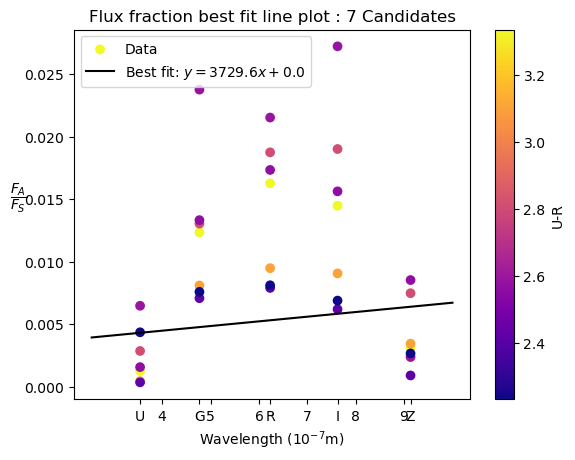

In [ ]:
# This cell generates a flux frac plot for any candidate list with a band flux frac std weighted best fit line
#  and has the option to colourmap the points

# This cell is running on the 7 good spiral candidates

# Now want to create a method for making 
# a flux frac plot and best fit line using any data size

candidates = np.array(['587726031719301138','587731892188545037','587736584426094619',
                           '587741603105210388','588017702930022421','588017724937142430',
                           '588848900983357543']).astype(str)

I_parent_dir = '/home/borge/Data/MLIS1_Output/Output_28_03_23/'
O_parent_dir = '/home/borge/Data/Test_batch/'

# Get output isolated data
I_composites, I_tables, identifiers = var_from_dir_raid(candidates,I_parent_dir)

# Get original data
O_composites = original_dir_raid(candidates,O_parent_dir)

print(O_composites)

# Perform flux fraction calculations for candidates
for i in range(0,len(identifiers)):
    exec('flux_frac_{} = gfits.flux_frac({},{})'.format(identifiers[i],O_composites[i],I_composites[i]))

# Create a list of variable names created
flux_frac_ = 'flux_frac_'
flux_fracs = np.empty_like(candidates)

for i in range(0,len(identifiers)):
    flux_fracs[i] = '{}{}'.format(flux_frac_,identifiers[i])
    
# Create array of flux fractions
flux_fractions = np.empty((len(candidates),len(bands)))
for i in range(0,len(candidates)):
    flux_fractions[i,:] = get_variable_from_name(flux_fracs[i]) 

# ^ This only works when the function is defiend locally ^

# Perform fitting + re-arrange data for easier processing

x = np.concatenate([wavs[0]*np.ones(len(candidates)),wavs[1]*np.ones(len(candidates)),
                    wavs[2]*np.ones(len(candidates)),wavs[3]*np.ones(len(candidates)),
                    wavs[4]*np.ones(len(candidates))])

y = np.concatenate([flux_fractions[:,0],flux_fractions[:,1],
                    flux_fractions[:,2],flux_fractions[:,3],
                    flux_fractions[:,4]])
y_err = np.concatenate([np.std(flux_fractions[:,0])*np.ones(len(candidates)),np.std(flux_fractions[:,1])*np.ones(len(candidates)),
                    np.std(flux_fractions[:,2])*np.ones(len(candidates)),np.std(flux_fractions[:,3])*np.ones(len(candidates)),
                    np.std(flux_fractions[:,4])*np.ones(len(candidates))])

m, c = np.polyfit(x,y,1,w=1/y_err)
x_ar = np.linspace(wavs[0]-1e-7,10*1e-7,10)

# Option for colourmapping

U_mags, R_mags, U_mag_errs, R_mag_errs, dists, zs, zerrs, colours, colour_errs = gfits.collect_candidate_info(candidates,good_spiral_data) # this could change!
print(U_mags.shape)
chosen_quantity = colours
colour_map =  np.concatenate([chosen_quantity,chosen_quantity,chosen_quantity,chosen_quantity,chosen_quantity,])

# Plotting

plt.figure()

plt.title('Flux fraction best fit line plot : {} Candidates'.format(len(candidates)))

plt.xlabel('Wavelength ($10^{-7}$m)')
plt.ylabel(r'$\dfrac{F_A}{F_S}$',rotation=0)

#plt.ylim(0,1)
plt.xticks([wavs[0],4*1e-7,wavs[1],5*1e-7,6*1e-7,wavs[2],7*1e-7,wavs[3],8*1e-7,9*1e-7,wavs[4]],['U','4','G','5','6','R','7','I','8','9','Z'])


plt.scatter(x,y,marker='o',c=colour_map,cmap='plasma')
plt.colorbar(label='U-R')
plt.plot(x_ar,m*x_ar+c,'k-')
plt.legend(['Data','Best fit: $y= {}x + {}$'.format(np.around(m,1),np.around(c,1))])

In [ ]:
# This cell generates a flux frac plot for any candidate list with a band flux frac std weighted best fit line
#  and has the option to colourmap the points

# This cell is running on the 100 brightest spiral candidates

# Now want to create a method for making 
# a flux frac plot and best fit line using any data size

candidates = np.loadtxt('/home/borge/Data/MLIS1_Output/01_04_23/Output_01_04_23/directories.txt',dtype=str)
failures = np.array(['588023670779281517','587742573761855511','587739720303181999',
           '587744729298239519','587731173306663288','587735349099954195'])

#candidates = np.asarray([s[:16] for s in candidates])

my_array = candidates
print(my_array.shape)
new_array = []

# The directory text file contains band information and duplicates 
# so this removes the bands and then finds the unique OBJID (div by 5)

for s in my_array:
    new_s = s[:-2]
    new_array.append(new_s)
    
new_array = np.asarray(new_array)

print(new_array.shape)
#print(len(candidates))
#failures = np.asarray([s[:16] for s in failures])
#print(failures)
candidates = np.unique(new_array)

# Create a boolean mask indicating which elements to remove
failure_mask = np.isin(candidates, failures)
#print(mask)

# Use boolean indexing to remove the elements
candidates = candidates[~failure_mask]
print(candidates.shape,' Cool so minus the failures')
len(candidates[0])



(500,)
(500,)
(94,)  Cool so minus the failures


18

In [ ]:
# Get the table data:
GZ2_Data = gfits.Read_Table('/home/borge/Data/gz2and1master.fits.gz')

obj_id_array = GZ2_Data['OBJID_STR'].astype(str)
unique_obj_id = np.unique(obj_id_array)
print(obj_id_array.shape,unique_obj_id.shape) # So collect candidate info isn't failing on duplicates


(248895,) (248895,)


In [ ]:
# Come back to this but get rid of the U band - its fucked

I_parent_dir = '/home/borge/Data/MLIS1_Output/01_04_23/Output_01_04_23/'
O_parent_dir = '/home/borge/Data/Brightest_1000/Brightest_1000_Spirals/'

# Get output isolated data
I_composites, I_tables, identifiers = var_from_dir_raid(candidates,I_parent_dir)

# Get original data
O_composites = original_dir_raid(candidates,O_parent_dir)
#print(O_composites[0])
#print(get_variable_from_name(O_composites[0]))
#plt.imshow(org_comp_9128[:,:,1])

# Perform flux fraction calculations for candidates
for i in range(0,len(identifiers)):
    exec('flux_frac_{} = gfits.flux_frac({},{})'.format(identifiers[i],O_composites[i],I_composites[i]))

# Create a list of variable names created
flux_frac_ = 'flux_frac_'
flux_fracs = np.empty_like(candidates)

for i in range(0,len(identifiers)):
    flux_fracs[i] = '{}{}'.format(flux_frac_,identifiers[i])
    
# Create array of flux fractions
flux_fractions = np.empty((len(candidates),len(bands)))
for i in range(0,len(candidates)):
    flux_fractions[i,:] = get_variable_from_name(flux_fracs[i]) 

# ^ This only works when the function is defiend locally ^


# Need to remove any rows that contain Nan - also need to work out why we are getting nans

nan_rows = np.isnan(flux_fractions).any(axis=1)
nan_positions = np.isnan(flux_fractions)
print(np.argwhere(nan_rows==True))
print(np.argwhere(nan_positions==True)) # So getting some failures in the Z band as well whihc is stopping the polyfit


flux_fractions = flux_fractions[~nan_rows]
candidates = candidates[~nan_rows]
print(flux_fractions)
# No this is not working instead will just remove the U band

# Perform fitting + re-arrange data for easier processing

x = np.concatenate([wavs[0]*np.ones(len(candidates)),wavs[1]*np.ones(len(candidates)),
                    wavs[2]*np.ones(len(candidates)),wavs[3]*np.ones(len(candidates)),
                    wavs[4]*np.ones(len(candidates))])

y = np.concatenate([flux_fractions[:,0],flux_fractions[:,1],
                    flux_fractions[:,2],flux_fractions[:,3],
                    flux_fractions[:,4]])
y_err = np.concatenate([np.std(flux_fractions[:,0])*np.ones(len(candidates)),np.std(flux_fractions[:,1])*np.ones(len(candidates)),
                    np.std(flux_fractions[:,2])*np.ones(len(candidates)),np.std(flux_fractions[:,3])*np.ones(len(candidates)),
                    np.std(flux_fractions[:,4])*np.ones(len(candidates))])

#m, c = np.polyfit(x,y,1,w=1/y_err)
m, c = np.polyfit(x[len(candidates):],y[len(candidates):],1,w=1/y_err[len(candidates):]) #,w=1/y_err[len(candidates):]
x_ar = np.linspace(wavs[0]-1e-7,10*1e-7,10)



print(m,c)

[28170000. 22740000. 21562000. 21542000. 25294000.]
[0.00073138 0.00543457 0.0065435  0.00622609 0.00206262]
[57125000. 43040000. 40601000. 40266000. 44108000.]
[-0.00757645  0.04086207  0.03317485  0.02885558  0.00778036]
[83915000. 68194000. 65204000. 64877000. 69196000.]
[-0.00122667 -0.02653603 -0.04549519 -0.03620765 -0.00715443]
[93925000. 77379000. 74355000. 73878000. 78747000.]
[-0.00049641 -0.00570251 -0.00693352 -0.00643399 -0.00090271]
[1.04917e+08 8.74220e+07 8.44200e+07 8.38260e+07 9.09310e+07]
[-0.00050634 -0.0026021  -0.00351187 -0.00345042 -0.0010397 ]
[1.14218e+08 9.52440e+07 9.22470e+07 9.18630e+07 1.00130e+08]
[-0.00015005 -0.00142276 -0.00206527 -0.00202624 -0.00067653]
[1.32797e+08 1.12731e+08 1.09481e+08 1.09114e+08 1.20475e+08]
[-0.00059678 -0.00366116 -0.00416917 -0.00370127 -0.00125012]
[1.84489e+08 1.61789e+08 1.58264e+08 1.58372e+08 1.68694e+08]
[-0.00121503 -0.0200207  -0.0298501  -0.02604144 -0.0042626 ]
[29112000.00124378 25890000.01235102 26873000.0162693

In [ ]:
# Also want to find the best fit gradient for each flux frac
# row and then plot this against colour

candidate_polyfit_gradients = np.empty_like(candidates,dtype=float)
for i in range(0,len(candidates)):
    candidate_polyfit_gradients[i],c_i = np.polyfit(flux_fractions[i,:],wavs,1)
    
candidate_polyfit_gradients

array([ 1.49329376e-05,  1.28052049e-06, -1.81462644e-06, -3.35762424e-06,
       -3.05090689e-05, -7.47611921e-05, -1.35710596e-05, -2.06840468e-06,
        9.19244363e-06, -5.22117206e-05, -5.08825103e-06, -2.24905859e-05,
       -1.75563247e-05, -2.47573529e-05, -2.69983901e-04, -8.15218477e-05,
       -2.88119746e-04, -5.88892489e-05, -7.01382351e-05, -9.75673977e-05,
       -2.64871145e-04, -2.11680579e-05, -1.08243211e-04, -8.27848609e-05,
        3.96935779e-05, -3.27358920e-04, -1.60296979e-04, -3.12648511e-04,
       -1.81099783e-04, -2.36916843e-04, -1.37171832e-04, -2.47556804e-04,
       -4.04872055e-04, -1.09017117e-04, -3.14714044e-04, -5.13489517e-04,
       -8.61676521e-04, -2.45666825e-04, -5.62930573e-04, -4.11259342e-04,
       -6.73580122e-04, -2.68473492e-04, -7.16077546e-04, -2.13828891e-04,
       -1.68711246e-04,  6.79431255e-06, -5.05469063e-07, -7.44998550e-06,
       -2.28512089e-05, -7.69630736e-06, -1.15416829e-04, -2.54111388e-05,
       -2.96624657e-05, -

In [ ]:
row = gfits.cat_search(GZ2_Data,candidates[0])
row

OBJID,OBJID_STR,RUN,RERUN,CAMCOL,FIELD,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,PETROMAGERR_U,PETROMAGERR_G,PETROMAGERR_R,PETROMAGERR_I,PETROMAGERR_Z,PSFMAG_R,FIBERMAG_R,DEVMAG_R,DEVMAGERR_R,EXPMAG_R,EXPMAGERR_R,FRACDEV_R,MU50_R,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,ROWC_U,COLC_U,ROWC_G,COLC_G,ROWC_R,COLC_R,ROWC_I,COLC_I,ROWC_Z,COLC_Z,CMODELMAG_R,CMODELMAGERR_R,REDSHIFT,REDSHIFTERR,PETROMAG_MU,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,REGION,PETROR50_R_KPC_SIMPLE_BIN,PETROMAG_MR_SIMPLE_BIN,REDSHIFT_SIMPLE_BIN,WVT_BIN,sample,asset_id,total_count,total_weight,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_weight,t03_bar_a06_bar_weight,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_weight,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_weight,t06_odd_a14_yes_weight,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_weight,t06_odd_a15_no_weighted_fraction,t06_odd_total_weight,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_weight,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_weight,t08_odd_feature_a24_merger_weighted_fraction,t08_odd_feature_a38_dust_lane_weight,t08_odd_feature_a38_dust_lane_weighted_fraction,t08_odd_feature_total_weight,t09_bulge_shape_a25_rounded_weight,t09_bulge_shape_a25_rounded_weighted_fraction,t09_bulge_shape_a26_boxy_weight,t09_bulge_shape_a26_boxy_weighted_fraction,t09_bulge_shape_a27_no_bulge_weight,t09_bulge_shape_a27_no_bulge_weighted_fraction,t09_bulge_shape_total_weight,t10_arms_winding_a28_tight_weight,t10_arms_winding_a28_tight_weighted_fraction,t10_arms_winding_a29_medium_weight,t10_arms_winding_a29_medium_weighted_fraction,t10_arms_winding_a30_loose_weight,t10_arms_winding_a30_loose_weighted_fraction,t10_arms_winding_total_weight,t11_arms_number_a31_1_weight,t11_arms_number_a31_1_weighted_fraction,t11_arms_number_a32_2_weight,t11_arms_number_a32_2_weighted_fraction,t11_arms_number_a33_3_weight,t11_arms_number_a33_3_weighted_fraction,t11_arms_number_a34_4_weight,t11_arms_number_a34_4_weighted_fraction,t11_arms_number_a36_more_than_4_weight,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_total_weight,U,G,R

In [ ]:
# Option for colourmapping


U_mags, R_mags, U_mag_errs, R_mag_errs, dists, zs, zerrs, colours, colour_errs = gfits.collect_candidate_info(candidates,GZ2_Data) # this could change!
print(U_mags.shape)
chosen_quantity = colours
colour_map =  np.concatenate([chosen_quantity,chosen_quantity,chosen_quantity,chosen_quantity,chosen_quantity])


      OBJID             OBJID_STR       ... arms_clean_union
------------------ -------------------- ... ----------------
587722984440529128 587722984440529128   ...             True         U         
------------------
16.414119720458984         R         
------------------
13.356245040893555
      OBJID             OBJID_STR       ... arms_clean_union
------------------ -------------------- ... ----------------
587724649793716359 587724649793716359   ...             True         U         
------------------
17.002580642700195         R         
------------------
13.241080284118652
      OBJID             OBJID_STR       ... arms_clean_union
------------------ -------------------- ... ----------------
587724650876174378 587724650876174378   ...             True         U         
------------------
15.929450035095215         R         
------------------
13.509592056274414
      OBJID             OBJID_STR       ... arms_clean_union
------------------ -------------------- ... ----

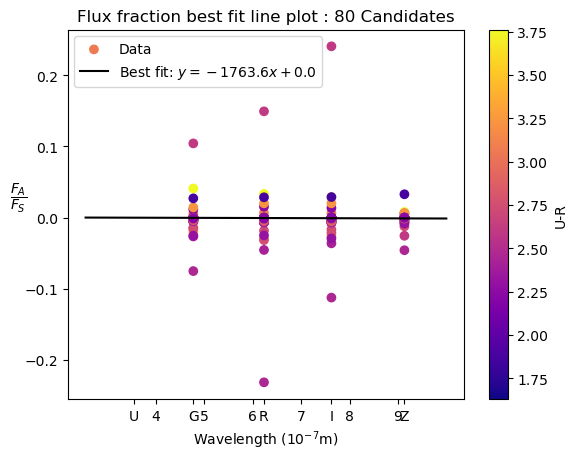

In [ ]:

# Plotting

plt.figure()

plt.title('Flux fraction best fit line plot : {} Candidates'.format(len(candidates)))

plt.xlabel('Wavelength ($10^{-7}$m)')
plt.ylabel(r'$\dfrac{F_A}{F_S}$',rotation=0)

#plt.ylim(0,1)
plt.xticks([wavs[0],4*1e-7,wavs[1],5*1e-7,6*1e-7,wavs[2],7*1e-7,wavs[3],8*1e-7,9*1e-7,wavs[4]],['U','4','G','5','6','R','7','I','8','9','Z'])

#plt.scatter(x,y,marker='o',c=colour_map,cmap='plasma')
plt.scatter(x[len(candidates):],y[len(candidates):],marker='o',c=colour_map[len(candidates):],cmap='plasma')
plt.colorbar(label='U-R')
plt.plot(x_ar,m*x_ar+c,'k-')
plt.legend(['Data','Best fit: $y= {}x + {}$'.format(np.around(m,1),np.around(c,1))])